In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [44]:
#Uploading data to a pandas table
data = pd.read_csv("cleaned_tweets.csv")
data.head(6)

,Unnamed: 0,user_name,likes,text,sport,followers,statuses_count,text_stemmed,text_lemmatized,text_string
0,0,StonyBrookWSOC,3,"['today', 'game', 'barbs', 'defense', 'game', ...",soccer,1178,2374,"['today', 'game', 'barb', 'defens', 'game', 'w...","['today', 'game', 'barb', 'defense', 'game', '...",today game barb defense game word
1,1,Amy Knapp,0,"['biggest', 'workout', 'today', 'putting', 'so...",soccer,2267,14601,"['biggest', 'workout', 'today', 'put', 'son', ...","['biggest', 'workout', 'today', 'putting', 'so...",biggest workout today putting son soccer ...
2,2,Lou Tobacco,0,"['winning', 'weekend', 'congratulations', 'aro...",soccer,328,84,"['win', 'weekend', 'congratul', 'around', 'lio...","['winning', 'weekend', 'congratulation', 'arou...",winning weekend congratulation around lion...
3,3,Parkside Rangers,0,"['extended', 'win', 'streak']",soccer,2158,9629,"['extend', 'win', 'streak']","['extended', 'win', 'streak']",extended win streak
4,4,ACU Sports,0,"['final', 'soccer', 'league', 'play', 'goal', ...",soccer,10272,23486,"['final', 'soccer', 'leagu', 'play', 'goal', '...","['final', 'soccer', 'league', 'play', 'goal', ...",final soccer league play goal second lef...
5,5,tnreels,5,"['mo', 'full', 'extension', 'layout', 'amp', '...",soccer,80,144,"['mo', 'full', 'extens', 'layout', 'amp', 'soc...","['mo', 'full', 'extension', 'layout', 'amp', '...",mo full extension layout amp soccer park


In [45]:
#Used data
x_data = np.array(data['text_lemmatized'])
y_data = np.array(data['likes'])

#Convert a collection of text documents to a matrix of token counts
count_vect = CountVectorizer()
x_data = count_vect.fit_transform(x_data)
tf_transformer = TfidfTransformer(use_idf=False).fit(x_data)
x_data = tf_transformer.transform(x_data)

print(x_data.shape)
print(y_data.shape)

(11118, 26)
(11118,)


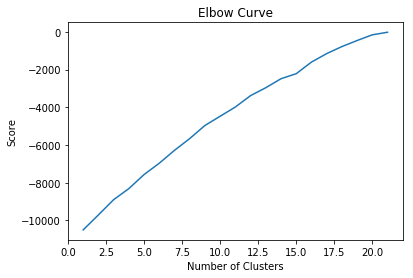

In [68]:
#Using the elbow method to determine the optimal number of clusters for k-means clustering
Nc = range(1, 22)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_data).score(x_data) for i in range(len(kmeans))]
score
#Ploting the data
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
# balance between the number of clusters and the average distance of the points of that group to its center.
plt.show()


Number of clusters 22
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


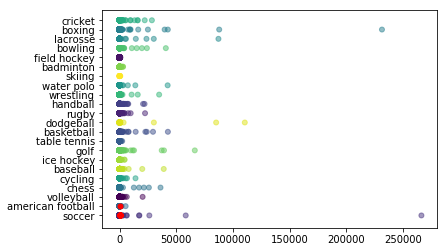

In [44]:
#K-Means
kmeans = KMeans(n_clusters=22).fit(x_data)

#Getting the centroids from the different clusters
centroids = kmeans.cluster_centers_
#print(centroids)
print("\nEstimated number of clusters",len(centroids))

#Plotting the data
plt.scatter(data['likes'], x_data, c= kmeans.labels_.astype(float), s=25, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=25)

labels = kmeans.labels_

#Quality Metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels[0:20]))   #Homogenity of data types
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels[0:20])) #Completeness of groups
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels[0:20]))       #Average(Homogenity,Completeness)

In [85]:
#AffinityPropagation
af = AffinityPropagation(affinity='euclidean', max_iter=200 ,preference=-50).fit(x_data.T)

#Getting the centroids from the different clusters
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

#Quality Metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels[0:20]))   #Homogenity of data types
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels[0:20])) #Completeness of groups
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels[0:20]))       #Average(Homogenity,Completeness)

Estimated number of clusters: 22
Homogeneity: 0.954
Completeness: 1.000
V-measure: 0.976
